# Пример инференса модели

## Импорт необходимых библиотек

In [1]:
import sys
import os
from tqdm.auto import tqdm
sys.path.append(os.path.abspath('..'))

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from src.models.model_inference import TabNetInference
from src.utils import checkpoint_path

import torch
import numpy as np
import random

def set_seed(seed: int):
    random.seed(seed)                      # Для модуля random
    np.random.seed(seed)                   # Для numpy
    torch.manual_seed(seed)                # Для CPU в PyTorch
    torch.cuda.manual_seed(seed)           # Для GPU в PyTorch
    torch.cuda.manual_seed_all(seed)       # Для всех GPU (если используется несколько)
    torch.backends.cudnn.deterministic = True  # Для детерминированности
    torch.backends.cudnn.benchmark = False     # Отключить оптимизации, которые делают процесс случайным

set_seed(42)

/home/students/bubbles_champagne/venv/lib/python3.10/site-packages/pydantic/main.py:212: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


## Пример инференса

In [ ]:
CHECKPOINT_ARCHIVE = os.path.join(checkpoint_path, )
TEST_IMAGES_FOLDER = "data/test_images"
TASK_NUMBER = 1

/home/students/bubbles_champagne/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Model, pretrainer, and decode dictionary loaded from /home/students/bubbles_champagne/checkpoints/trained_model_task1.zip


  0%|          | 0/2472 [00:00<?, ?it/s]

0.7289644012944984
              precision    recall  f1-score   support

        pink       0.87      0.53      0.66      1217
       white       0.67      0.92      0.78      1255

    accuracy                           0.73      2472
   macro avg       0.77      0.73      0.72      2472
weighted avg       0.77      0.73      0.72      2472

[[ 643  574]
 [  96 1159]]


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

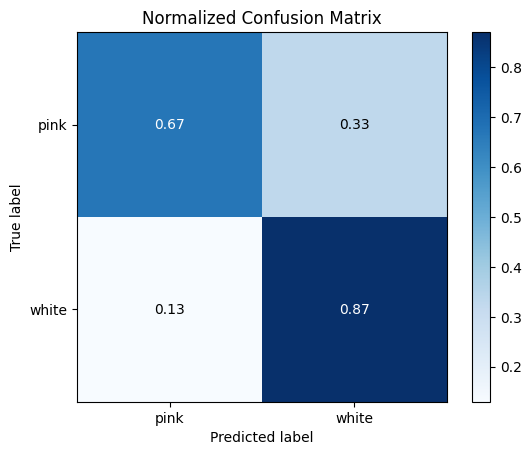

In [3]:
plot_confusion_matrix(y_true, preds, normalize=True)

In [4]:
test_paths = []
y_true = []
preds = []

for root, dirs, files in os.walk("/home/students/bubbles_champagne/frames/test"):
    for file in files:
        if file.endswith(".jpg"):
            full_image_path = os.path.join(root, file)
            test_paths.append(full_image_path)
            
task_type = "container_type"

model = MainModelInference(checkpoint_path, task_type)

for path in tqdm(test_paths):
    name = path.split(os.sep)[-2].split("_")[1]
    pred = model.predict(path)
    if pred:
        preds.append(pred)
        y_true.append(name)

print(accuracy_score(y_true, preds))
print(classification_report(y_true, preds))
print(confusion_matrix(y_true, preds))

/home/students/bubbles_champagne/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Model, pretrainer, and decode dictionary loaded from /home/students/bubbles_champagne/checkpoints/trained_model_task2.zip


/home/students/bubbles_champagne/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/2472 [00:00<?, ?it/s]

0.7487864077669902
              precision    recall  f1-score   support

       glass       0.68      0.89      0.77      1161
     plastic       0.86      0.63      0.73      1311

    accuracy                           0.75      2472
   macro avg       0.77      0.76      0.75      2472
weighted avg       0.78      0.75      0.75      2472

[[1029  132]
 [ 489  822]]


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

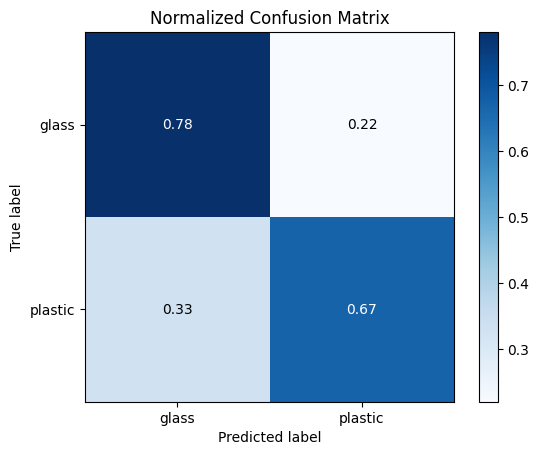

In [5]:
plot_confusion_matrix(y_true, preds, normalize=True)

In [8]:
test_paths = []
y_true = []
preds = []

for root, dirs, files in os.walk("/home/alcatraz/Documents/PycharmProjects/bubbles_champagne/frames/test"):
    for file in files:
        if file.endswith(".jpg"):
            full_image_path = os.path.join(root, file)
            test_paths.append(full_image_path)
            
task_type = "time"

model = MainModelInference(checkpoint_path, task_type)

for path in tqdm(test_paths):
    name = path.split(os.sep)[-2].split("_")[2]
    pred = model.predict(path)
    if pred:
        preds.append(pred)
        y_true.append(name)

print(accuracy_score(y_true, preds))
print(classification_report(y_true, preds))
print(confusion_matrix(y_true, preds))

/home/alcatraz/Documents/PycharmProjects/bubbles_champagne/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Model, pretrainer, and decode dictionary loaded from /home/alcatraz/Documents/PycharmProjects/bubbles_champagne/checkpoints/trained_model_task3.zip


/home/alcatraz/Documents/PycharmProjects/bubbles_champagne/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/2621 [00:00<?, ?it/s]

0.6146508966043495
              precision    recall  f1-score   support

           0       0.74      0.50      0.60       785
          10       0.75      0.83      0.79       615
          15       0.44      0.58      0.50       575
          20       0.57      0.57      0.57       646

    accuracy                           0.61      2621
   macro avg       0.63      0.62      0.62      2621
weighted avg       0.64      0.61      0.62      2621

[[393 103 220  69]
 [ 86 511   5  13]
 [ 27  16 336 196]
 [ 25  53 197 371]]


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

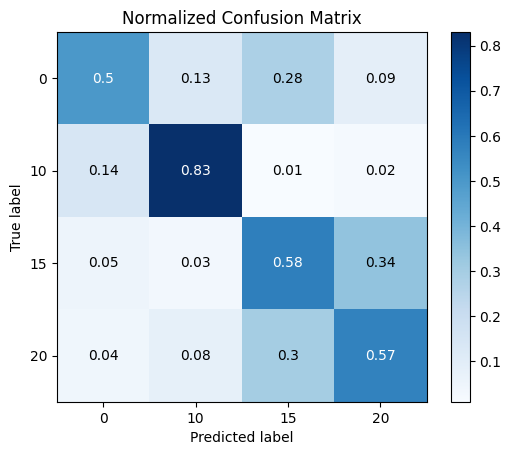

In [10]:
plot_confusion_matrix(y_true, preds, normalize=True)